In [9]:
# First lets import some stuff and add some "magic commands"
%load_ext autoreload 
#automatically reloads scripts so I dont have to refresh the Kernel
%matplotlib inline
# Makes my pltos inline justified - apparently this makes them "better"
import obspy 
import math
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import obspy.core
from obspy.clients.fdsn import Client
from obspy.taup import TauPyModel
from obspy.clients.fdsn.header import FDSNException

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
### Import Jack's SKS Splitting and my observations from using Broadband traces. Both as Pandas dataframes
# JACK_IMP = pd.read_csv("./Data/Jacks_SKS_RAW.txt",delim_whitespace=True)
data = pd.read_csv("./NEW_Splitting.txt",delim_whitespace=True)
a = data['FAST']
d = data.index[np.isnan(data['FAST']) == True].tolist() # Find any rows which contain NaNs
data = data.drop(d)
#splitting = data[['FAST','DFAST','TLAG','DTLAG','WL_FAST','WL_DFAST','WL_TLAG','WL_DTLAG','QUAL']]# Drop rows which have NaNS

### First Let's Plot My Results compared to Jacks 
##### (N.B WL_FAST and WL_TLAG are the column headings for Jacks data 

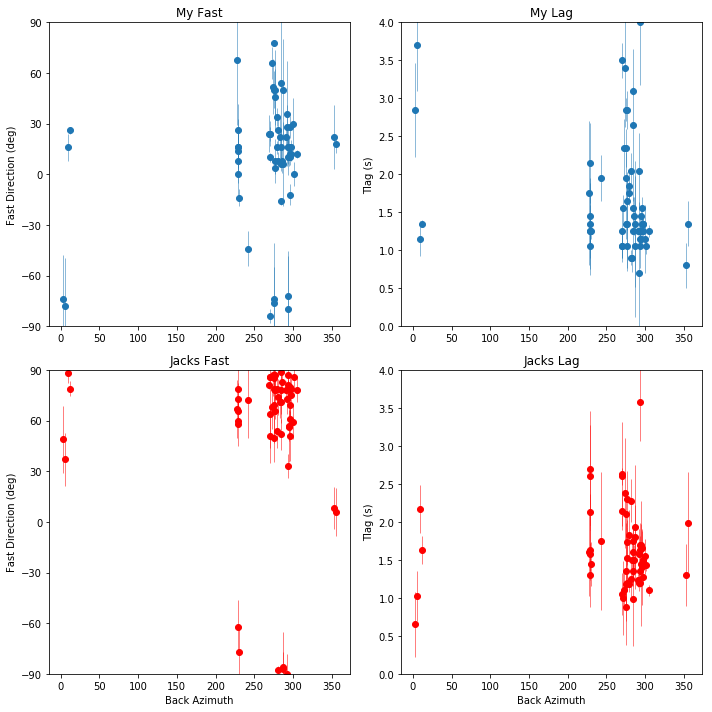

In [43]:

fig,axs = plt.subplots(2, 2,sharex='col',figsize=(10,10))
plt.subplot(221)
plt.errorbar(data['BAZ'],data['FAST'],yerr=data['DFAST'],fmt='o',elinewidth=0.5)
plt.ylabel('Fast Direction (deg)')
plt.ylim([-90,90])
plt.yticks(np.arange(-90,91,30))
plt.title('My Fast')

plt.subplot(223)
plt.errorbar(data['BAZ'],data['WL_FAST'],yerr=data['WL_DFAST'],fmt='ro',elinewidth=0.5)
plt.ylim([-90,90])
plt.yticks(np.arange(-90,91,30))
plt.title('Jacks Fast')
plt.xlabel('Back Azimuth')
plt.ylabel('Fast Direction (deg)')

plt.subplot(222)
plt.errorbar(data['BAZ'],data['TLAG'],yerr=data['DTLAG'],fmt='o',elinewidth=0.5)
plt.ylabel('Tlag (s)')
plt.ylim([0,4])
plt.title('My Lag')

plt.subplot(224)
plt.errorbar(data['BAZ'],data['WL_TLAG'],yerr=data['WL_DTLAG'],fmt='ro',elinewidth=0.5)
plt.ylim([0,4])
plt.ylabel('Tlag (s)')
plt.xlabel('Back Azimuth')
plt.title('Jacks Lag')

plt.tight_layout()
plt.show()

### Now We have made the first simple plot, lets try to interrogate the data some more. 
#### Lets try to determine average fast (circular avg) and tlag for mine and jacks meausrments and the difference in indiviual measurements

In [46]:
import scipy as scp # Need scipy fo rthe circular mean function 

mean_fast = scp.stats.circmean(data['FAST'],high =180, low =-180)
mean_tlag = scp.mean(data['TLAG'])
mean_wl_fast =  scp.stats.circmean(data['WL_FAST'],high =180, low =-180)
mean_wl_tlag = scp.mean(data['WL_TLAG'])

In [49]:
print('{:04.2f}, {:-4.2f} is the mean of my measurements'.format(mean_fast,mean_tlag))
print('{:04.2f}, {:-4.2f} is the mean of Jacks measurements'.format(mean_wl_fast,mean_wl_tlag))

12.27, 1.65 is the mean of my measurements
65.49, 1.62 is the mean of Jacks measurements


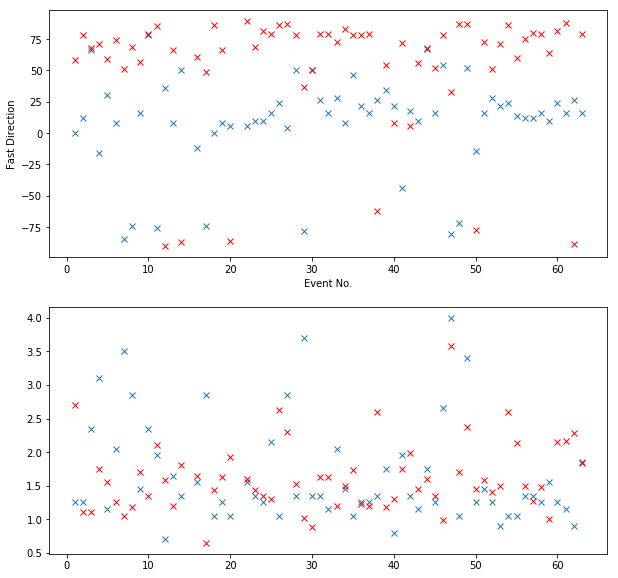

In [75]:
fig2,ax2 = plt.subplots(2,1,sharex='col',figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(data.index,data['FAST'],'x')
plt.plot(data.index,data['WL_FAST'],'rx')
plt.ylabel('Fast Direction')
plt.xlabel('Event No.')

plt.subplot(2,1,2)
plt.plot(data.index,data['TLAG'],'x')
plt.plot(data.index,data['WL_TLAG'],'rx')

plt.show()

In [59]:
data.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
            19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
            54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
           dtype='int64')

Text(0,0.5,'Frequency')

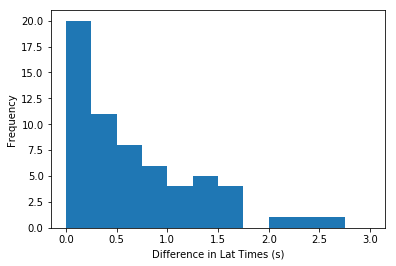

In [83]:
t_diff = abs(data['TLAG'] - data['WL_TLAG'])
plt.hist(t_diff,bins=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])#,'bx')
plt.xlabel('Difference in Lat Times (s)')
plt.ylabel('Frequency')

In [114]:
import splitwavepy as sw 

with open('/Users/ja17375/Scripts/Python/Splitting_Codes/SKS_Splitting/Eigm_Files/Eigm_NEW_summary.txt','r') as reader:
    eigs = []
    for line in reader.readlines():
        e = line.strip().split('\n')[-1] # Strip off newline characters
        eig_load = sw.load('/Users/ja17375/Scripts/Python/Splitting_Codes/SKS_Splitting/Eigm_Files/{}'.format(e))
        eigs.append(eig_load) #Creates a list of eigm objects
reader.close()

stacked = sw.measure.Stack(eigs)
stacked.wolfe_silver()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
type(axs[1,1])

In [ ]:
list(result.values())[1]

In [ ]:
result['distance']

In [22]:
dup = JACK['DATE'].duplicated()
dup.count()

101

In [25]:
JACK[(JACK['TLAG']<1.0)]['TLAG']

2    -85.0
4    -85.0
5    -85.0
12   -87.0
18   -65.0
24   -80.0
26   -85.0
43   -90.0
45   -87.0
52   -86.0
75   -62.0
87   -77.0
99   -88.0
Name: FAST, dtype: float64

3    -70.0
4    -16.0
7    -86.0
8    -80.0
11   -78.0
12    -4.0
16    -8.0
17   -68.0
18   -18.0
20   -86.0
29   -16.0
30    -4.0
38   -40.0
41   -32.0
47   -80.0
50   -12.0
Name: FAST, dtype: float64

### The below code fragment can be used to match my splitting observations to Jack's and produce (and save) a new dataframe containing both measurements 

In [167]:
# In order to be able to compare my splitting to jacks, I need to make the date information be the same format.
# For now I will do this conversion here. In the future it may be more useful to directly report dates in Julday format
#
Joe_Jul = [0 for row in range(len(JOSEPH))] # list that will hold the converted dates
# a = [] 
nans = []
# First lets add some new columns to house the matched splitting data.
JACK_FAST = np.zeros(shape=(len(JOSEPH),1))
JACK_DFAST = JACK_FAST.copy()
JACK_TLAG = JACK_FAST.copy()
JACK_DTLAG = JACK_FAST.copy()


for i in range(0,len(JOSEPH)):
    if not math.isnan(JOSEPH['YEAR'][i]): # If I was not able to attempt a mesurement this will be a nan. So we want to exclude these rows
        #Create a UTCDateTime object d for each of my observations
        d = obspy.core.UTCDateTime(int(JOSEPH['YEAR'][i]),int(JOSEPH['MON'][i]),int(JOSEPH['DAY'][i]),int(JOSEPH['HOUR'][i]),int(JOSEPH['MIN'][i]))#,JOSEPH['SEC'][i])
        #Now use the UTCDateTime object to return the dates in the same format used by jack (YYYYJJJ) 
        Joe_Jul[i] = int(str(d.year)+str(d.julday).zfill(3))
        
        match = (JACK[(JACK['DATE'] == Joe_Jul[i])])
       
        if len(match) != 1:
            
            Exception('More than one Julian Day match for {}',jul)
        else:
            pass
        # Append the index of the row to the variable a. This allows me to later slice the required rows of Jacks data.
        # This is the most logical way to do this in a iPython environment but perhaps could be made more efficient if/when
        # This is combined into the rest of the module
#         a.append(int(match.index.values.tolist()[0]))
        b = int(match.index.values.tolist()[0])
        
        (JACK_FAST[i],JACK_DFAST[i],JACK_TLAG[i],JACK_DTLAG[i]) = (JACK['FAST'][b],JACK['DFAST'][b],JACK['TLAG'][b],JACK['DTLAG'][b])
    else:
        
        (Joe_Jul[i],JACK_FAST[i],JACK_DFAST[i],JACK_TLAG[i],JACK_DTLAG[i]) = math.nan,math.nan,math.nan,math.nan,math.nan
        nans.append(i)  
        #Do nothing, there is no splitting measurement. Passing a nan into UTCDatetime throws an error. 
#Now we have set up Jacks data to be added in the write place, lets add it
comb = JOSEPH.assign(DATE = Joe_Jul, JACK_FAST = JACK_FAST,JACK_DFAST = JACK_DFAST,JACK_TLAG=JACK_TLAG,JACK_DTLAG=JACK_DTLAG)

# Now extract (and slightly re-order) all the columns that I want right now
comparison = comb[['STAT','DATE','FAST','DFAST','TLAG','DTLAG','JACK_FAST','JACK_DFAST','JACK_TLAG','JACK_DTLAG','QUAL']]
comparison=comparison.drop(nans)

comparison.to_csv('Joseph_Jack_splitting_comp.txt',sep= ' ')

In [191]:
comparison[(comparison['QUAL']== 'a')]

,STAT,DATE,FAST,DFAST,TLAG,DTLAG,JACK_FAST,JACK_DFAST,JACK_TLAG,JACK_DTLAG,QUAL
2,NEW,1999345.0,12.0,3.5,1.25,0.08,78.0,7.25,1.10,0.07,a
6,NEW,2001148.0,8.0,5.5,2.05,0.28,74.0,10.50,1.25,0.24,a
9,NEW,2002001.0,8.0,5.5,1.35,0.08,57.0,9.25,1.70,0.27,a
10,NEW,2002010.0,78.0,1.5,2.35,0.25,79.0,14.00,1.35,0.47,a
13,NEW,2002290.0,6.0,8.5,1.75,0.33,66.0,5.25,1.20,0.11,a
16,NEW,2003182.0,-8.0,6.5,1.55,0.18,61.0,6.75,1.65,0.23,a
19,NEW,2003273.0,8.0,6.0,1.25,0.12,66.0,5.50,1.63,0.28,a
22,NEW,2004210.0,6.0,4.0,1.55,0.15,89.0,8.25,1.60,0.33,a
23,NEW,2005036.0,10.0,5.0,1.35,0.10,69.0,6.50,1.43,0.11,a
24,NEW,2005046.0,6.0,12.5,1.15,0.25,81.0,7.75,1.35,0.11,a


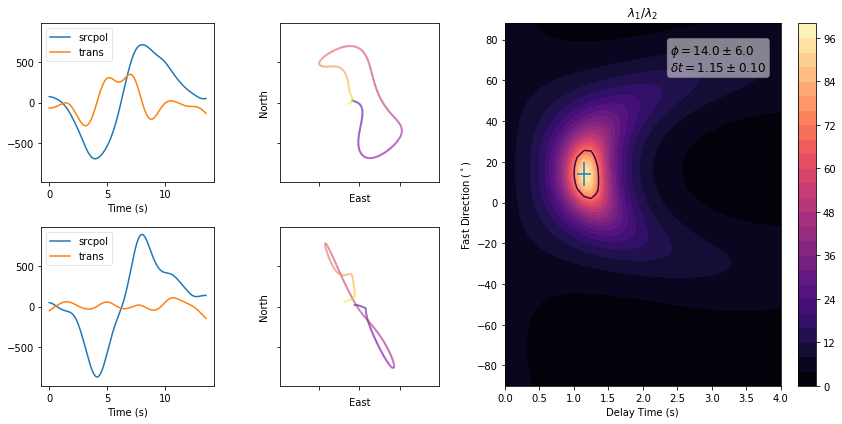

In [198]:
import splitwavepy as sw
sw.load('/Users/ja17375/Scripts/Python/Splitting_Codes/SKS_Splitting/Eigm_Files/NEW_2005_02_15_14_42_23.eigm').plot()


In [194]:
pwd

'/Users/ja17375/Scripts/Python/Splitting_Codes/SKS_Splitting'

In [210]:
st = obspy.read('./Data/NEW_2007_07_22_10_49_39_*.sac')
st[0].stats

         network: US
         station: NEW
        location: 
         channel: BHE
       starttime: 2007-07-22T10:49:39.400000Z
         endtime: 2007-07-22T11:39:39.375000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 120000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -207.0, 'depmax': 399.0, 'scale': 1.0, 'b': 0.0, 'e': 2999.9751, 'stla': 48.259998, 'stlo': -117.12, 'evla': -2.8353, 'evlo': 141.713, 'evdp': 35.700001, 'dist': 11071.612, 'az': 41.545589, 'baz': 276.70822, 'gcarc': 99.696289, 'depmen': 36.361217, 'nzyear': 2007, 'nzjday': 203, 'nzhour': 10, 'nzmin': 49, 'nzsec': 39, 'nzmsec': 400, 'nvhdr': 6, 'npts': 120000, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'NEW', 'kcmpnm': 'BHE', 'knetwk': 'US'})

In [47]:
# In this fragment I now want to see if my recorded events match with Jacks. Each of the 7 character date strings should
# be unique so testing for equality should yield a maximum of 1 match.

a = [] # list to hold the indicies of the rows from Jacks data that match 
for jul in Joe_Jul:
    # The variable match holds the row of Jack's data which match a given julian date string
    match = (JACK[(JACK['DATE'] == jul)])
    if len(match) != 1:
        Exception('More than one Julian Day match for {}',jul)
    else:
        pass
    # Append the index of the row to the variable a. This allows me to later slice the required rows of Jacks data.
    # This is the most logical way to do this in a iPython environment but perhaps could be made more efficient if/when
    # This is combined into the rest of the module
    a.append(int(match.index.values.tolist()[0]))
    
if len(a) == len(Joe_Jul): #Tests to see if I have found matches for all of my obervations
    print("All Julian Days Match")
else:
    pass

All Julian Days Match


In [48]:
a

[31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 51,
 52,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [72]:
JACK.iloc[a,:][['FAST','DFAST','TLAG','DTLAG']] #iloc is a pandas attribute that splices rows given interger positions [row,column]


,FAST,DFAST,TLAG,DTLAG
31,58.0,13.25,2.70,0.76
32,78.0,7.25,1.10,0.07
33,68.0,12.75,1.10,0.26
34,71.0,7.00,1.75,0.16
35,59.0,10.00,1.55,0.23
36,74.0,10.50,1.25,0.24
38,51.0,16.25,1.05,0.28
39,69.0,22.50,1.18,0.80
40,57.0,9.25,1.70,0.27
41,79.0,14.00,1.35,0.47


In [36]:
tst = [1,5,80]
JACK.iloc[match.index[:],:]

,DATE,TIME,EVLA,EVLO,STLA,STLO,EVDP,DIST,AZI,BAZ,...,DSPOL,WBEG,WEND,STAT,EIGORIG,EIGCORR,Q,SNR,NDF,AUTOQC
100,2010320,139,-1.99,139.02,48.26,-117.12,13.0,100.7,41.32,279.08,...,0.27,1465.0,1500.0,NEW,0.0774,0.0047,-0.082,16.135,21,split


In [76]:
JOSEPH_NONAN[['FAST','DFAST','TLAG','DTLAG']]

,FAST,DFAST,TLAG,DTLAG
1,4.0,14.0,1.35,0.35
2,12.0,3.5,1.25,0.08
3,-70.0,31.5,1.75,0.35
4,-16.0,2.0,3.10,0.05
5,30.0,22.5,1.15,0.62
6,8.0,5.5,2.05,0.28
7,-86.0,6.5,3.40,0.65
8,-80.0,12.0,2.85,0.15
9,8.0,5.5,1.35,0.08
10,78.0,1.5,2.35,0.25


In [ ]:
math.isnan(JOSEPH['YEAR'][1])